# <a href='https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/'> SOURCE </a> 

# Prepared Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_name_json_sift = 'test_dump/test_lintroller_sift.json'
file_name_json_akaze = 'test_dump/test_lintroller_akaze.json'
file_name_label = '../Lab2/excel_files/lintroller_test.xlsx'

metrices_sift = pd.read_json(file_name_json_sift)
metrices_akaze = pd.read_json(file_name_json_akaze)
df_labels_lintroller = pd.read_excel(file_name_label)

In [3]:
metrices_akaze.image_name = list(map(lambda x: x[:-4], metrices_akaze.image_name))
metrices_sift.image_name = list(map(lambda x: x[:-4], metrices_sift.image_name))

metrices_sift = metrices_sift.drop(['ratio', 'pixels'], axis=1)
df_labels_lintroller = df_labels_lintroller.rename(columns={'Name': 'image_name'})

In [4]:
print(f'metrix_lintroller_sift:\t{metrices_sift.shape}')
print(f'metrix_lintroller_akaze:\t{metrices_akaze.shape}')
print(f'df_labels_lintroller:\t{df_labels_lintroller.shape}')

metrix_lintroller_sift:	(49, 5)
metrix_lintroller_akaze:	(49, 7)
df_labels_lintroller:	(49, 2)


In [5]:
metrices_sift.head()

,image_name,thread_time_sift,matches_good_ratio_sift,localization_error_l1_mean_sift,localization_error_l2_mean_sift
0,lintroller_100,0.184128,0.019629,17.003141,577.539496
1,lintroller_131,0.025408,0.020720,21.093363,838.015177
2,lintroller_132,0.021550,0.038168,34.651307,2202.841015
3,lintroller_133,0.021624,0.029444,24.703148,1196.868673
4,lintroller_134,0.026095,0.014177,19.087922,674.691577


In [6]:
train_without_labels = pd.merge(metrices_akaze, metrices_sift, on='image_name')
train_without_labels.head()

,image_name,ratio,pixels,thread_time_akaze,matches_good_ratio_akaze,localization_error_l1_mean_akaze,localization_error_l2_mean_akaze,thread_time_sift,matches_good_ratio_sift,localization_error_l1_mean_sift,localization_error_l2_mean_sift
0,lintroller_100,0.75,983040,0.117644,0.006061,6.721212,83.381818,0.184128,0.019629,17.003141,577.539496
1,lintroller_131,0.75,76800,0.024179,0.018182,9.687879,163.906061,0.025408,0.020720,21.093363,838.015177
2,lintroller_132,0.75,76800,0.022589,0.021212,12.715152,252.793939,0.021550,0.038168,34.651307,2202.841015
3,lintroller_133,0.75,76800,0.027272,0.018182,10.451515,201.627273,0.021624,0.029444,24.703148,1196.868673
4,lintroller_134,0.75,76800,0.023213,0.024242,9.551515,165.539394,0.026095,0.014177,19.087922,674.691577


In [7]:
train_with_labels = pd.merge(train_without_labels, df_labels_lintroller, on='image_name') 
train_with_labels.head()

,image_name,ratio,pixels,thread_time_akaze,matches_good_ratio_akaze,localization_error_l1_mean_akaze,localization_error_l2_mean_akaze,thread_time_sift,matches_good_ratio_sift,localization_error_l1_mean_sift,localization_error_l2_mean_sift,bool
0,lintroller_100,0.75,983040,0.117644,0.006061,6.721212,83.381818,0.184128,0.019629,17.003141,577.539496,1
1,lintroller_131,0.75,76800,0.024179,0.018182,9.687879,163.906061,0.025408,0.020720,21.093363,838.015177,1
2,lintroller_132,0.75,76800,0.022589,0.021212,12.715152,252.793939,0.021550,0.038168,34.651307,2202.841015,1
3,lintroller_133,0.75,76800,0.027272,0.018182,10.451515,201.627273,0.021624,0.029444,24.703148,1196.868673,1
4,lintroller_134,0.75,76800,0.023213,0.024242,9.551515,165.539394,0.026095,0.014177,19.087922,674.691577,1


In [8]:
train_with_labels = train_with_labels.drop(['image_name'], axis=1)

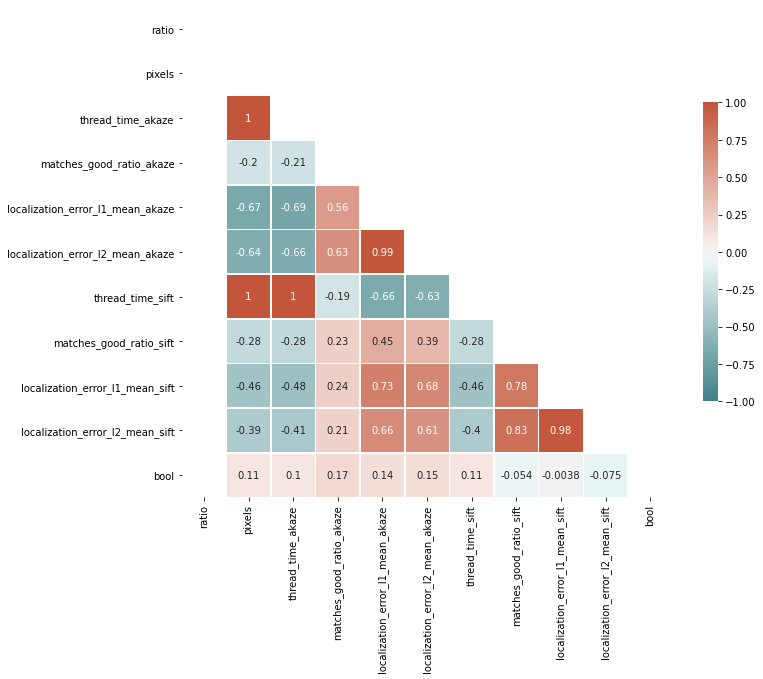

In [9]:
correlation = train_with_labels.corr()

features_counts = len(train_with_labels.columns)

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(features_counts, features_counts))

cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5,cbar_kws={'shrink': .5}, annot=True)

plt.show()

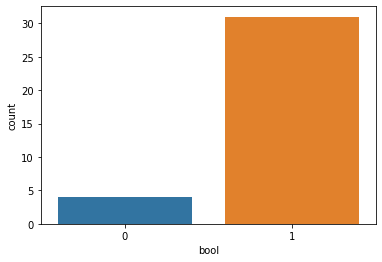

In [10]:
sns.countplot(train_with_labels['bool'], label='Sum')
plt.show()

In [17]:
X_train = train_with_labels.drop(['bool'], axis=1)
y_train = train_with_labels['bool']

In [38]:
X_train.shape

(35, 10)

# Create models

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, \
                            roc_auc_score , accuracy_score, precision_score

from xgboost import XGBClassifier

In [27]:
models = []
models.append(('LR', LogisticRegression(solver='saga', penalty='l1', class_weight="balanced")))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecTree', DecisionTreeClassifier())) 
models.append(('RF', RandomForestClassifier(n_estimators = 3))) 
models.append(('XGB', XGBClassifier()))
models.append(('GaussianNB', GaussianNB()))

In [28]:
mod_list = []
for mod , _ in models:
    mod_list.append(mod)

mod_list.append('Cleaning')

df_boxplot = pd.DataFrame(columns=['Score', 'ML'])

In [31]:
def get_score_for_model():
    seed = 13

    results = []
    names = []
    scoring = 'accuracy'

    for name, model in models:
        strat = StratifiedKFold(n_splits=3, random_state=seed)

        cv_results = cross_val_score(model, X_train, y_train, cv=strat, scoring=scoring, n_jobs=-1)

        results.append(cv_results)
        names.append(name)

        print(f"{name}: {cv_results.mean()} ({cv_results.std()})")
        
    return results

In [32]:
results = get_score_for_model()

LR: 0.6136363636363636 (0.37118635243480286)
KNN: 0.8863636363636364 (0.03762541521654376)
DecTree: 0.8308080808080809 (0.06497313298115456)
RF: 0.8863636363636364 (0.03762541521654376)
XGB: 0.8863636363636364 (0.03762541521654376)
GaussianNB: 0.6590909090909091 (0.17680374812337676)


/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/sklearn/mod

In [34]:
def append_res_to_boxplot(results, df):
    i = 0
    while i < len(results[0]):
        line = []
        for num, ml in zip(results, mod_list): 
            line.append([num[i],ml])

        i = i+1
        df = df.append(pd.DataFrame(line, columns=['Score', 'ML']),ignore_index=True)
    return df

In [35]:
df_boxplot = append_res_to_boxplot(results, df_boxplot)
df_boxplot

,Score,ML
0,0.916667,LR
1,0.916667,KNN
2,0.750000,DecTree
3,0.916667,RF
4,0.916667,XGB
5,0.416667,GaussianNB
6,0.833333,LR
7,0.833333,KNN
8,0.833333,DecTree
9,0.833333,RF


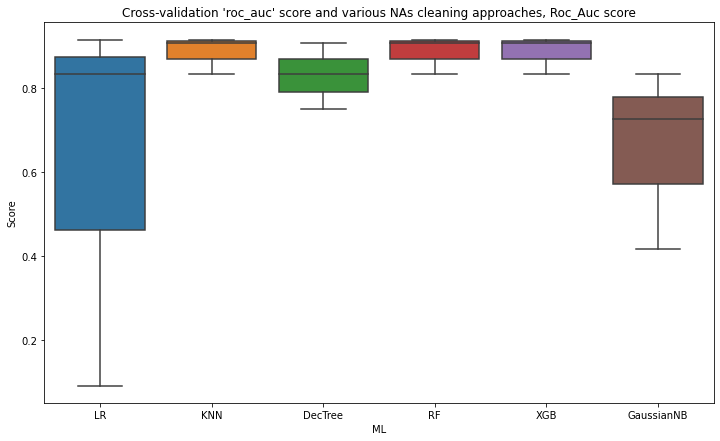

In [36]:
# Plotting the results 
plt.figure(figsize=(12,7))
plt.title("Cross-validation 'roc_auc' score and various NAs cleaning approaches, Roc_Auc score")
sns.boxplot(data = df_boxplot, x = 'ML',y='Score');